In [62]:
from astropy import units as u
from astropy import time

import numpy as np

from poliastro import iod
from poliastro.bodies import Earth, Mars, Sun
from poliastro.ephem import Ephem
from poliastro.maneuver import Maneuver
from poliastro.twobody import Orbit
from poliastro.util import time_range
from poliastro.plotting import OrbitPlotter3D, StaticOrbitPlotter


# More info: https://plotly.com/python/renderers/
import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook_connected"

from astropy.coordinates import solar_system_ephemeris


solar_system_ephemeris.set("jpl")

<ScienceState solar_system_ephemeris: 'jpl'>

In [63]:
# Initial data
date_launch = time.Time("2011-11-26 15:02", scale="utc").tdb
date_arrival = time.Time("2012-08-06 05:17", scale="utc").tdb
earth = Ephem.from_body(Earth, time_range(date_launch, end=date_arrival))
mars = Ephem.from_body(Mars, time_range(date_launch, end=date_arrival))
# Solve for departure and target orbits
ss_earth = Orbit.from_ephem(Sun, earth, date_launch)
ss_mars = Orbit.from_ephem(Sun, mars, date_arrival)
# Solve for the transfer maneuver
man_lambert = Maneuver.lambert(ss_earth, ss_mars)

# Get the transfer and final orbits
ss_trans, ss_target = ss_earth.apply_maneuver(man_lambert, intermediate=True)
#propogate orbit out to Mars
ss_final = ss_trans.propagate(date_arrival-date_launch-0.005*u.day)


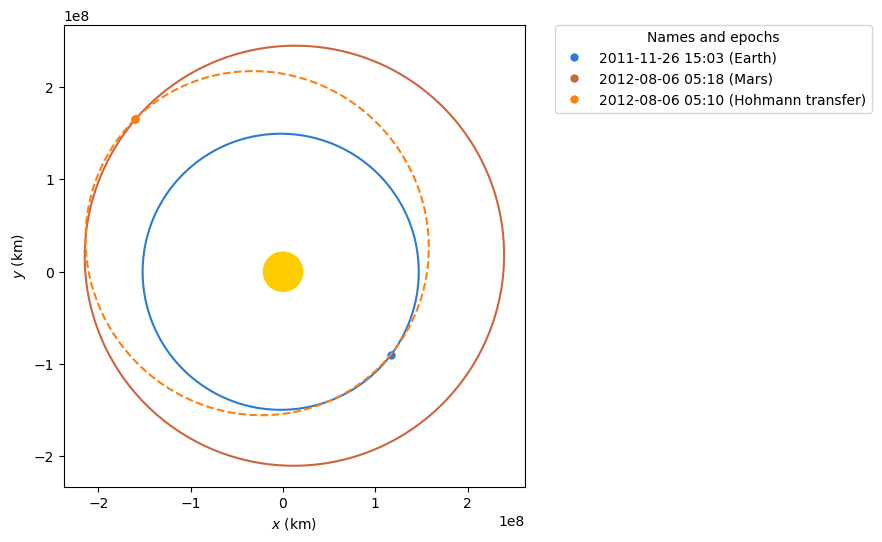

In [ ]:

# We can check new bodies positions
plotter = StaticOrbitPlotter()
plotter.plot_body_orbit(Earth,  date_launch, label="Earth")
plotter.plot_body_orbit(Mars,  date_arrival, label="Mars")

plotter.plot(ss_final, color="C1", label="Hohmann transfer arrival")


[-7609.81055228  4751.52838162  1817.93412745] km
4787 x -29967 km x 17.9 deg (MarsICRS) orbit around Mars (♂) at epoch 2012-08-06 05:18:07.183 (TDB)


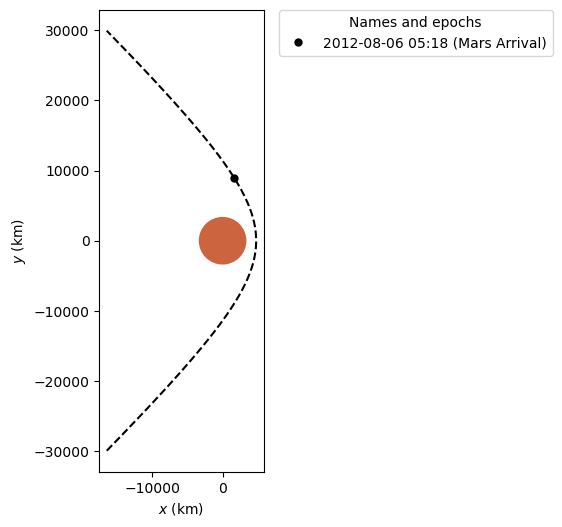

In [65]:




#arrival at Mars
#solve for arrival at Mars from ss_final
r_mars, v_mars = ss_mars.r,ss_mars.v
r_sc_arriv = ss_final.r-r_mars
v_sc_arriv = ss_final.v-v_mars
print(r_sc_arriv)

arrival_orbit = Orbit.from_vectors(Mars,r_sc_arriv,v_sc_arriv,epoch=date_arrival)
print(arrival_orbit)

mars_plotter = StaticOrbitPlotter()

mars_plotter.plot(arrival_orbit, label="Mars Arrival", color="k")